## Machine Predictive Maintenance
## Capstone Two: Pre-processing and Training Data Development

From the previous step, I've selected three independent variables: 'Process temperature [K]', 'Rotational speed [rpm]', and 'Tool wear [min]'. In this phase of the project, my primary focus will be on data preprocessing. This includes tasks such as normalizing and standardizing all the features in the dataset, as well as creating a validation set for our analysis. set.

The raw dataset can be obtained through the following link:

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the updated data from the previous project, Capstone Two: EDA.
data = pd.read_csv('data02.csv', index_col=0)

In [3]:
data.head()

,Machine failure,Type,Temperature,Tool wear [min],Rotationalspeed
UID,,,,,
1,0,M,308.6,0,1551
2,0,L,308.7,3,1408
3,0,L,308.5,5,1498
4,0,L,308.6,7,1433
5,0,L,308.7,9,1408


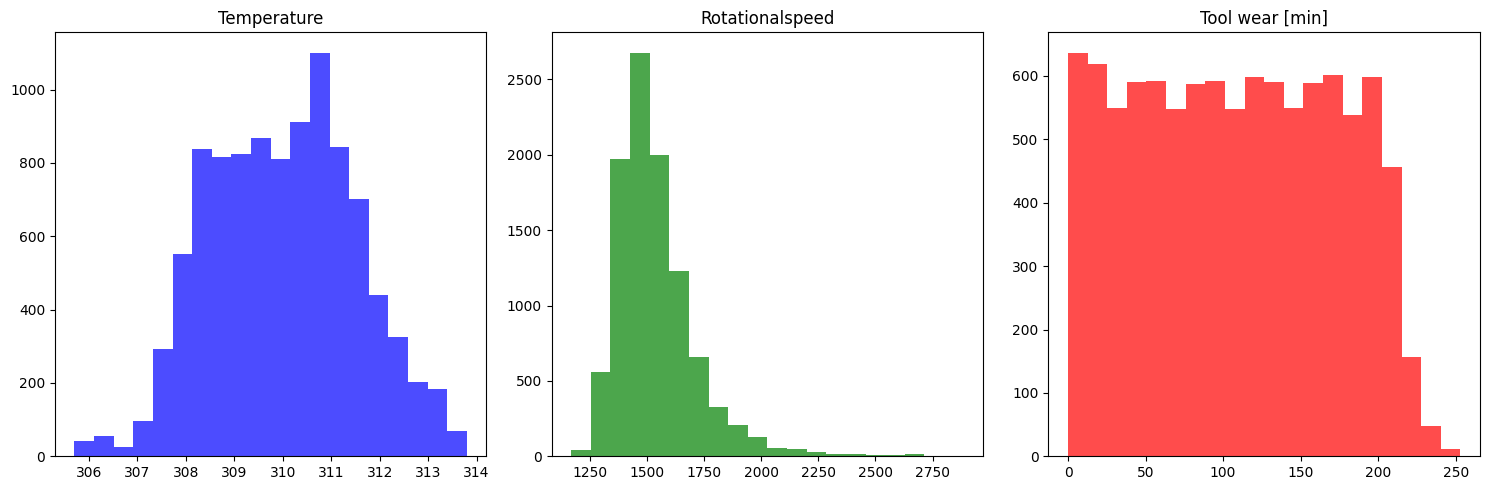

In [4]:
# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot for Process Temperature
plt.subplot(131)
plt.hist(data['Temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Temperature')

# Plot for Rotational speed [rpm]
plt.subplot(132)
plt.hist(data['Rotationalspeed'], bins=20, color='green', alpha=0.7)
plt.title('Rotationalspeed')

# Plot for Tool wear [min]
plt.subplot(133)
plt.hist(data['Tool wear [min]'], bins=20, color='red', alpha=0.7)
plt.title('Tool wear [min]')

plt.tight_layout()
plt.show()

### Pre-processing features

The 'Tool wear [min]' feature contains values ranging from 0 to over 250 minutes. Since our project is all about predicting maintenance events over time, just normalizing these values might not make much sense. Instead, I'll convert these values from minutes to hours. This will give us a more meaningful scale while still keeping the time-related aspect intact.

In [5]:
# Convert 'Tool wear [min]' to 'Tool wear [hour]'
data['Tool wear [hour]'] = data['Tool wear [min]'] / 60
data.drop('Tool wear [min]', axis=1, inplace=True)

In [6]:
# Save the data before splitting it into training and validation because I will be trying different ways of splitting.
data.to_csv('data03.csv', index=True)

### Training Data Development

Data will be splitted by using the first 80% of the data points for training and the last 20% for testing.

In [7]:
from sklearn.model_selection import train_test_split

# Define your features (independent variables) and target (dependent variable)
X = data[['Temperature', 'Rotationalspeed', 'Tool wear [hour]', 'Type']]
y = data['Machine failure']

# Define the split point (80% of data for training, 20% for testing)
split_fraction = 0.8
split_index = int(len(data) * split_fraction)

# Split the data into training and validation sets
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 4)
X_test shape: (2000, 4)
y_train shape: (8000,)
y_test shape: (2000,)


### Rescaling Features

"I will normalize the 'Process temperature [K]' and 'Rotational speed [rpm]' features, scaling them to a range between 0 and 1. This normalization will initially be applied to the training set and then carried over to both the training and testing datasets.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the 'Process temperature [K]' and 'Rotational speed [rpm]' features on the training set
X_train[['Temperature', 'Rotationalspeed']] = scaler.fit_transform(X_train[['Temperature', 'Rotationalspeed']])

# Transform the same features on the test set using the same scaler
X_test[['Temperature', 'Rotationalspeed']] = scaler.transform(X_test[['Temperature', 'Rotationalspeed']])

C:\Users\Dallen\AppData\Local\Temp\ipykernel_21120\366530526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Temperature', 'Rotationalspeed']] = scaler.fit_transform(X_train[['Temperature', 'Rotationalspeed']])
C:\Users\Dallen\AppData\Local\Temp\ipykernel_21120\366530526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Temperature', 'Rotationalspeed']] = scaler.transform(X_test[['Temperature', 'Rotationalspeed']])


In [9]:
X_train.head()

,Temperature,Rotationalspeed,Tool wear [hour],Type
UID,,,,
1,0.358025,0.222934,0.000000,M
2,0.370370,0.139697,0.050000,L
3,0.345679,0.192084,0.083333,L
4,0.358025,0.154249,0.116667,L
5,0.370370,0.139697,0.150000,L


In [10]:
X_test.head()

,Temperature,Rotationalspeed,Tool wear [hour],Type
UID,,,,
8001,0.777778,0.160070,2.516667,M
8002,0.777778,0.119907,2.566667,L
8003,0.790123,0.397555,2.600000,M
8004,0.777778,0.061700,2.650000,M
8005,0.777778,0.212456,2.700000,L


After rescaling the three features, 'temperature' and 'Rotationalspeed' now have values ranging from 0 to 1, while 'Tool wear [hour]' ranges from 0 to 4+.

'Type' column is categorical data, and I will use OneHotEncoder to convert it into dummy variables

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid multicollinearity

# Fit and transform the 'Type' column of the training set
X_train_encoded = encoder.fit_transform(X_train[['Type']])

# Transform the 'Type' column of the test set using the same encoder
X_test_encoded = encoder.transform(X_test[['Type']])

# Create DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['Type']), index = X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['Type']), index = X_test.index)

# Drop the original 'Type' columns and Concatenate the encoded features with the training and test data
X_train = pd.concat([X_train, X_train_encoded_df], axis=1).drop(['Type'], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1).drop(['Type'], axis=1)

C:\Users\Dallen\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
X_train.head()

,Temperature,Rotationalspeed,Tool wear [hour],Type_L,Type_M
UID,,,,,
1,0.358025,0.222934,0.000000,0.0,1.0
2,0.370370,0.139697,0.050000,1.0,0.0
3,0.345679,0.192084,0.083333,1.0,0.0
4,0.358025,0.154249,0.116667,1.0,0.0
5,0.370370,0.139697,0.150000,1.0,0.0


In [13]:
X_test.head()

,Temperature,Rotationalspeed,Tool wear [hour],Type_L,Type_M
UID,,,,,
8001,0.777778,0.160070,2.516667,0.0,1.0
8002,0.777778,0.119907,2.566667,1.0,0.0
8003,0.790123,0.397555,2.600000,0.0,1.0
8004,0.777778,0.061700,2.650000,0.0,1.0
8005,0.777778,0.212456,2.700000,1.0,0.0


In [14]:
# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


In [15]:
# Save the training and testing sets to separate CSV files
X_train.to_csv('X_train.csv', index=True)
X_test.to_csv('X_test.csv', index=True)
y_train.to_csv('y_train.csv', index=True)
y_test.to_csv('y_test.csv', index=True)